In [26]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Prepare data and labels
data = []
result = []

# Read pneumonia images
for r, d, f in os.walk(r'C:\Users\pirat\Downloads\pneumonia 2-20240125T203918Z-001\classification\pneumonia'):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file))
            img = img.resize((256, 256))
            img = np.array(img)
            if img.shape == (256, 256, 3):
                data.append(np.array(img))
                result.append(0)  # Label 0 for pneumonia

# Read normal images
for r, d, f in os.walk(r"C:\Users\pirat\Downloads\pneumonia 2-20240125T203918Z-001\classification\normal"):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file))
            img = img.resize((256, 256))
            img = np.array(img)
            if img.shape == (256, 256, 3):
                data.append(np.array(img))
                result.append(1)  # Label 1 for normal

In [28]:
# Convert to numpy arrays
data = np.array(data)
result = np.array(result)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Build the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [29]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
27/27 [==============================] - 69s 3s/step - loss: 23.5123 - accuracy: 0.7326 - val_loss: 15.1045 - val_accuracy: 0.6667
Epoch 2/10
27/27 [==============================] - 69s 3s/step - loss: 10.2087 - accuracy: 0.8233 - val_loss: 11.9402 - val_accuracy: 0.8333
Epoch 3/10
27/27 [==============================] - 69s 3s/step - loss: 5.0929 - accuracy: 0.8791 - val_loss: 9.7731 - val_accuracy: 0.7778
Epoch 4/10
27/27 [==============================] - 71s 3s/step - loss: 5.0121 - accuracy: 0.8814 - val_loss: 15.0058 - val_accuracy: 0.8241
Epoch 5/10
27/27 [==============================] - 71s 3s/step - loss: 3.8575 - accuracy: 0.9163 - val_loss: 10.8334 - val_accuracy: 0.8241
Epoch 6/10
27/27 [==============================] - 71s 3s/step - loss: 1.0442 - accuracy: 0.9674 - val_loss: 11.0828 - val_accuracy: 0.7130
Epoch 7/10
27/27 [==============================] - 72s 3s/step - loss: 0.4644 - accuracy: 0.9814 - val_loss: 12.5333 - val_accuracy: 0.8241
Epoch 8/10
2

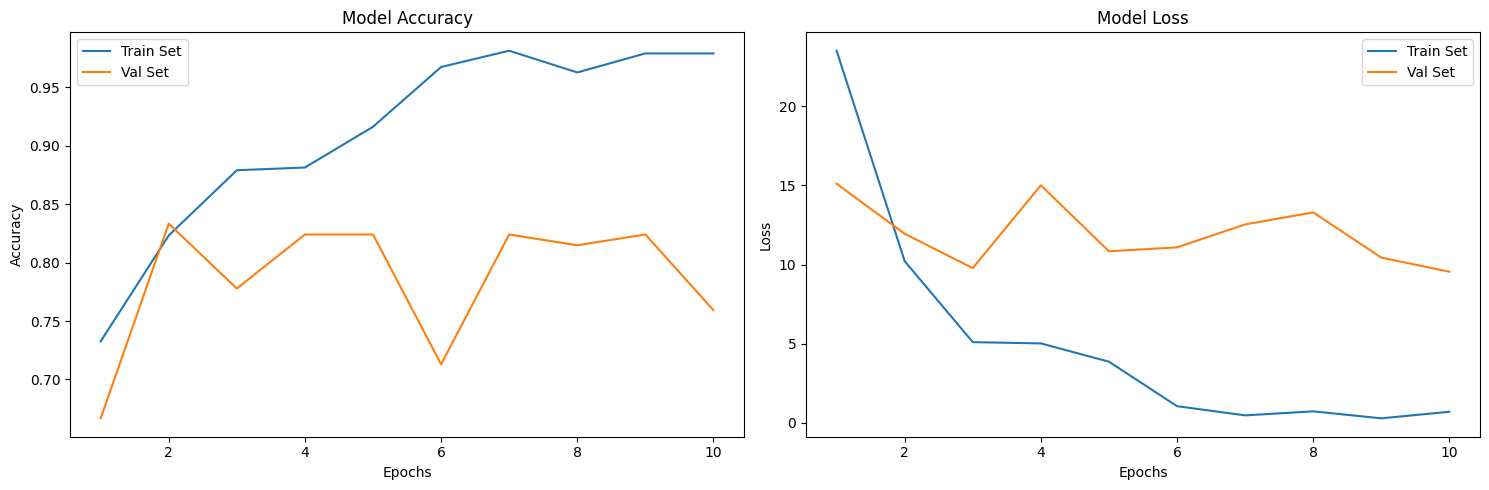

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()